In [1]:
### import the basic libraries and graphic setting 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set(style='darkgrid')

In [2]:
## don't show warning message 
import warnings
warnings.filterwarnings("ignore")

In [3]:
## get the datasets 
train = pd.read_csv('data/train.csv', parse_dates = ['datetime'] )
test = pd.read_csv('data/test.csv', parse_dates = ['datetime'] )
print(train.shape, test.shape)

(10886, 12) (6493, 9)


#### Feature engineering 
###### 1. spilt the "datetime" --> year, month, day, hour, minute, second, & dayofweek 
###### 2. replace the zero values in "windspeed"  --> predicted value by ML (w/ season, weather, humidity,m ...) 
###### 3. define categorical variables 

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
## spilt the datatimes 
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2


In [6]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,2012,12,31,23,0,0,0


In [7]:
## make 'year_month' with 'year' and 'month' 
def concatenate_year_month(datetime) : 
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
test['year_month'] = test['datetime'].apply(concatenate_year_month)

In [10]:
train.head(1) 
#test.head(0)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1


In [11]:
## Define the categorical variables to [ season, holiday, workingday, weather, year, month, hour, dayofweek, year_month) 
## ***** they have numeric values, but the values are not real values 

categorical_feature_names = ['season' , 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek', 'year_month']

for var in categorical_feature_names: 
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

[Text(0.5, 1.0, 'Test : windspeed')]

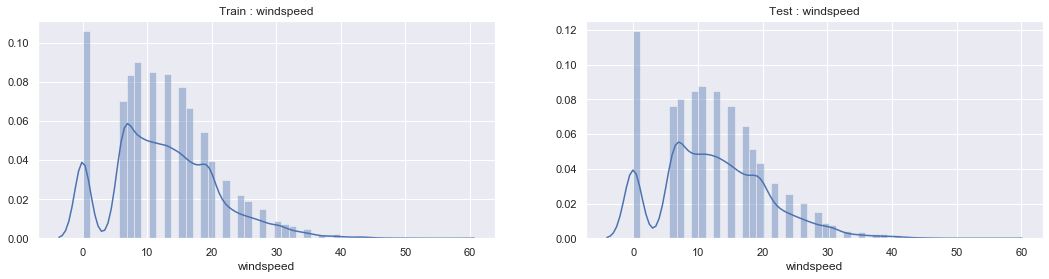

In [12]:
## review the "windspeed"
figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)
sns.distplot(train['windspeed'], ax=ax1)  
sns.distplot(test['windspeed'], ax=ax2)  
ax1.set(title = 'Train : windspeed')
ax2.set(title = 'Test : windspeed')

In [13]:
## so many 0 in windspeed (not measured?). Let's fill it with predicted value  
## (1) spilt the dataset : windspeed = zero or not 
trainwind0 = train[train['windspeed']==0] 
trainwindnot0 = train[train['windspeed']!=0] 
print(trainwind0.shape, trainwindnot0.shape)

(1313, 20) (9573, 20)


In [14]:
## (2) predict the real windspeed with ML 
from sklearn.ensemble import RandomForestClassifier

## make the function 
def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data[data['windspeed'] == 0]
    dataWindNot0 = data[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "year", "temp", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해, 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

[Text(0.5, 1.0, 'Test : windspeed-predicted')]

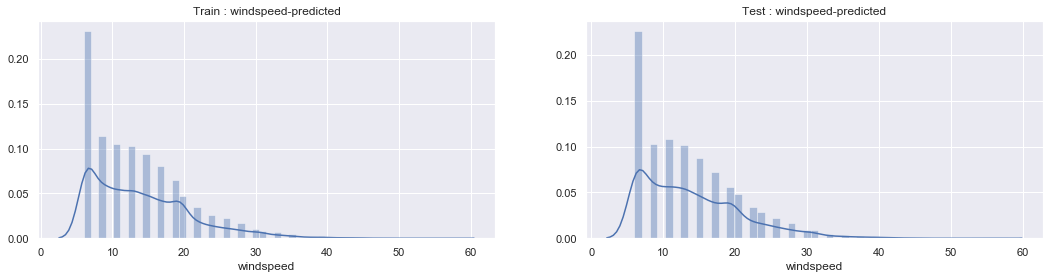

In [15]:
## (3) replace the windspeed=0 whit the predicted value
train = predict_windspeed(train)
test = predict_windspeed(test)

## (4) re-review the "windspeed"
figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)
sns.distplot(train['windspeed'], ax=ax1)  
sns.distplot(test['windspeed'], ax=ax2)  
ax1.set(title = 'Train : windspeed-predicted')
ax2.set(title = 'Test : windspeed-predicted')

In [17]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5,2011-1
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5,2011-1
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5,2011-1


### Random Forest modeling 

In [19]:
## (1) select the variables for modeling (Your Choice!!)
feature_names = ['season','holiday','workingday','weather','temp','humidity','windspeed','year','hour','dayofweek']

In [20]:
## (2) make train datasets 
X_train = train[feature_names]
X_test = test[feature_names]

print(X_train.shape, X_test.shape)

(10886, 10) (6493, 10)


In [23]:
## (3) define Y variable
label_name = "count"
y_train = train[label_name]

y_train.shape
#y_train.head()

(10886,)

In [24]:
## (4) Prepare how to evaluate the model 1 : define the "RMSLE" (Goal is to minimize the "RMSLE")
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer 

make_scorer(rmsle)

In [27]:
## (5) Prepare how to evaluate the model 2 : define the K-Fold cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
k_fold

KFold(n_splits=10, random_state=0, shuffle=True)

In [28]:
## (6) import RandomForest & set the parameters 
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
model = RandomForestRegressor(n_estimators=100,    ## how many trees? 
                              n_jobs=-1,           ## The number of jobs to run in parallel for both fit and predict (default = -1)
                              random_state=0)      ## random seed (default = 0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [30]:
## get the result in train dataset (score by model) 
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()      ### small score is better!!  
score

Wall time: 19.4 s


0.32959629868290163

In [38]:
print('Model Result Score = {0}'.format(score))
print('Model Result Score = {0:.2f}'.format(score))
print('Model Result Score = {0:.5f}'.format(score))

Model Result Score = 0.32959629868290163
Model Result Score = 0.33
Model Result Score = 0.32960


In [39]:
## (7) model fitting : x --> y 
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [41]:
## (8) get the predicted "Y(count)" in test dataset 
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([ 11.79,   3.28,   3.01, ..., 212.53,  60.73, 184.9 ])

[Text(0.5, 1.0, 'test')]

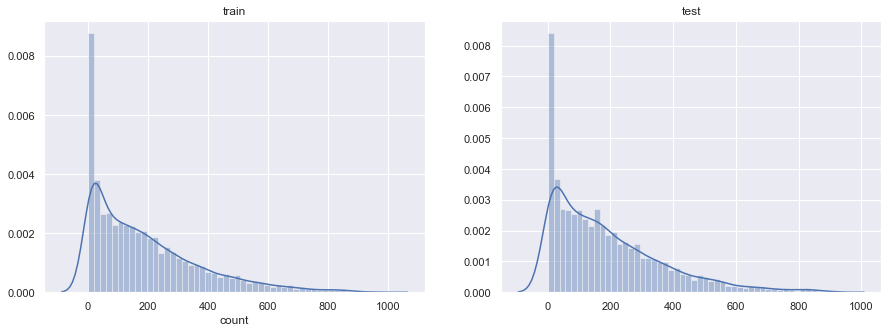

In [42]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(15,5)

sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [43]:
## this is to submit file (for kaggle registation)
submission = pd.read_csv('data/sampleSubmission.csv')
submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.79
1,2011-01-20 01:00:00,3.28
2,2011-01-20 02:00:00,3.01
3,2011-01-20 03:00:00,5.88
4,2011-01-20 04:00:00,39.73


In [48]:
submission.to_csv('data/Submission.csv', index=False)